In [1]:
# Muskan Pandey

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

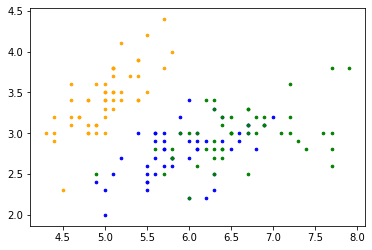

In [2]:
data = load_iris()
X = data['data']
y = data['target']

# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])

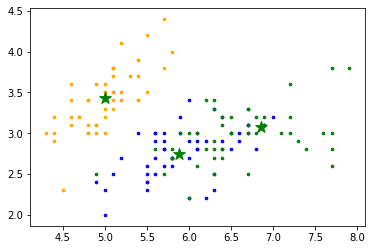

In [13]:
from copy import deepcopy

# Number of clusters
K = 3
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

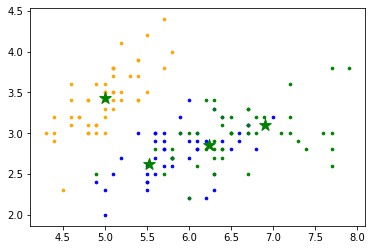

In [3]:
from copy import deepcopy

# Number of clusters
K = 4
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

In [ ]:
# Another approach

In [6]:
class KMeans:
    
    def __init__(self, n_clusters=4):
        self.K = n_clusters
        
    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
        
    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x)**2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])
    

In [7]:
print(__doc__)

Automatically created module for IPython interactive environment


/home/muskan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


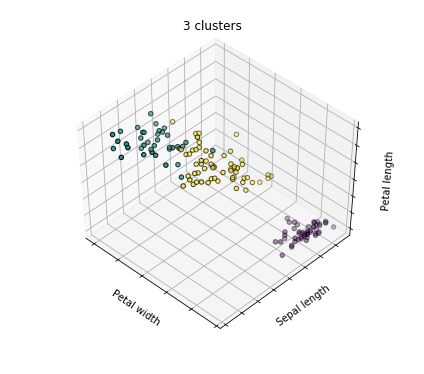

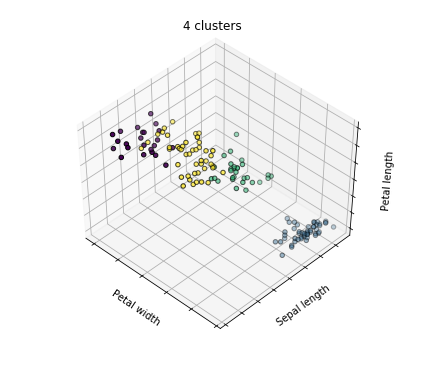

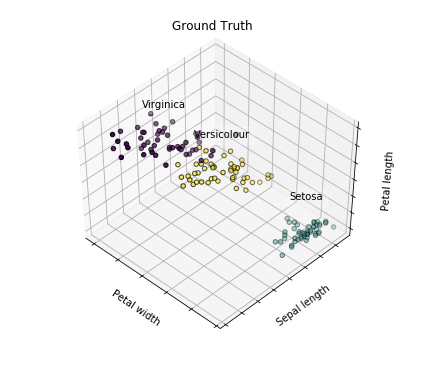

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_4', KMeans(n_clusters=4))]

fignum = 1
titles = ['3 clusters', '4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


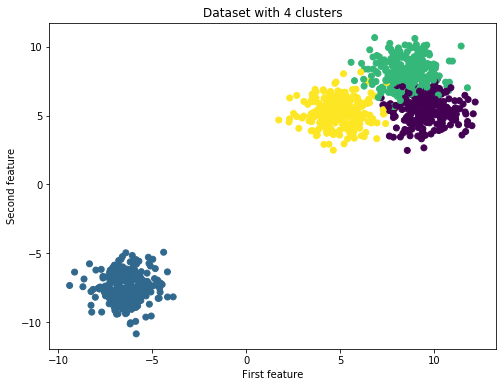

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, n_samples=1000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4).fit(X)

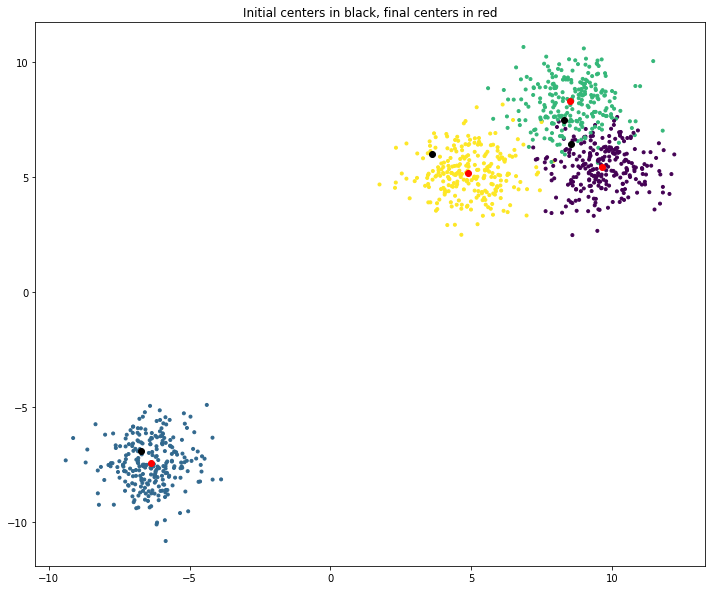

In [11]:
plt.figure(figsize=(12,10))
plt.title("Initial centers in black, final centers in red")
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r')
plt.scatter(kmeans.intial_centroids[:, 0], kmeans.intial_centroids[:,1], c='k')
plt.show()